In [1]:
# Load dependencies/packages
import numpy as np # for array operations
import pandas as pd # for neat tables, database-like grouping/summary tables & csv_read
import matplotlib.pyplot as plt # for the occasional plot
import seaborn as sns # for the occasional plot
sns.set_theme(style="whitegrid")

In [2]:
# Load Data
base_data = pd.read_csv('data/joinedResults.csv', infer_datetime_format=True, parse_dates=['date'])

In [3]:
base_data

,customer_id,campaign_id,date,viewers,pageviews,avg_duration_per_viewer,chats,likes,clicks_sum,click_revenue_sum_usd
0,2,5073,2022-11-24,45751,93970,147.886337,1170,34670,2123,1.294150e+05
1,2,5138,2022-12-01,67039,164489,125.591696,779,17729,2008,5.275550e+05
2,2,5286,2022-12-08,49438,97989,132.506732,498,16364,1203,6.080510e+05
3,2,5333,2022-12-15,49414,95602,135.549018,855,42533,3642,3.537560e+05
4,2,5567,2022-12-22,55133,104726,154.623454,2198,34881,11318,3.933031e+06
...,...,...,...,...,...,...,...,...,...,...
1625,171,12849,2023-10-31,1104,1222,87.741817,3,4837,70,8.315385e-01
1626,171,12858,2023-10-30,1451,1616,63.512626,0,3072,117,1.340000e+00
1627,171,12860,2023-10-31,1561,1703,62.677658,0,2125,184,7.692308e-03
1628,171,12924,2023-11-01,2003,2217,77.918585,9,53,177,1.410769e+00


In [4]:
base_data.dtypes

customer_id                         int64
campaign_id                         int64
date                       datetime64[ns]
viewers                             int64
pageviews                           int64
avg_duration_per_viewer           float64
chats                               int64
likes                               int64
clicks_sum                          int64
click_revenue_sum_usd             float64
dtype: object

In [5]:
clean_data = base_data.dropna() # 1630 -> 1630 no NAs dropped, drops dates as well

In [6]:
clean_data.describe()

,customer_id,campaign_id,viewers,pageviews,avg_duration_per_viewer,chats,likes,clicks_sum,click_revenue_sum_usd
count,1630.000000,1630.000000,1630.000000,1630.00000,1630.000000,1630.000000,1630.000000,1630.000000,1.630000e+03
mean,116.290798,9471.267485,11422.746626,15585.80184,168.925827,1215.055215,7312.598160,6836.435583,1.618952e+05
std,71.654225,2118.740342,25225.830944,32423.44027,87.794446,4109.785768,13812.815102,12854.960503,7.205739e+05
min,2.000000,4025.000000,520.000000,613.00000,24.352381,0.000000,0.000000,17.000000,0.000000e+00
25%,29.000000,8066.250000,1562.250000,1785.25000,102.642131,14.000000,129.000000,239.250000,1.451923e-01
50%,171.000000,9264.500000,3070.500000,3809.50000,160.647649,82.000000,1752.500000,1074.000000,8.280769e-01
75%,171.000000,11417.500000,10804.250000,15694.00000,202.561446,855.000000,9767.500000,7517.250000,3.441923e+00
max,171.000000,12925.000000,266270.000000,293050.00000,960.020370,105875.000000,225468.000000,150736.000000,1.474316e+07


In [7]:
# Set min click_revenue_sum to USD $10
# clean_data = clean_data[(clean_data['click_revenue_sum_usd'] >= 10)]

In [8]:
# Set customer_id to 51 (platform specific)
clean_data = clean_data[(clean_data['customer_id'] == 51)] # 91

In [9]:
clean_data.describe()

,customer_id,campaign_id,viewers,pageviews,avg_duration_per_viewer,chats,likes,clicks_sum,click_revenue_sum_usd
count,91.0,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,51.0,7876.505495,28385.681319,33130.054945,255.833918,7481.703297,18628.274725,6708.538462,1.447591
std,0.0,2199.462067,62022.961243,70664.037363,111.930645,12620.936874,13143.715452,5217.552486,1.673129
min,51.0,4054.000000,1830.000000,2073.000000,24.352381,468.000000,2079.000000,756.000000,0.143846
25%,51.0,6204.500000,3381.000000,4490.000000,204.199181,2023.500000,9294.500000,3535.500000,0.485000
50%,51.0,7298.000000,4630.000000,5741.000000,267.432974,4398.000000,14996.000000,4916.000000,0.926154
75%,51.0,9186.500000,6527.000000,8822.000000,318.794539,7982.000000,25394.500000,9221.500000,1.748846
max,51.0,12754.000000,259970.000000,288794.000000,629.285387,105875.000000,72656.000000,34218.000000,9.766154


In [10]:
clean_data = clean_data.drop(columns=['date', 'customer_id', 'campaign_id'])

In [11]:
clean_data_corr = clean_data.corr()

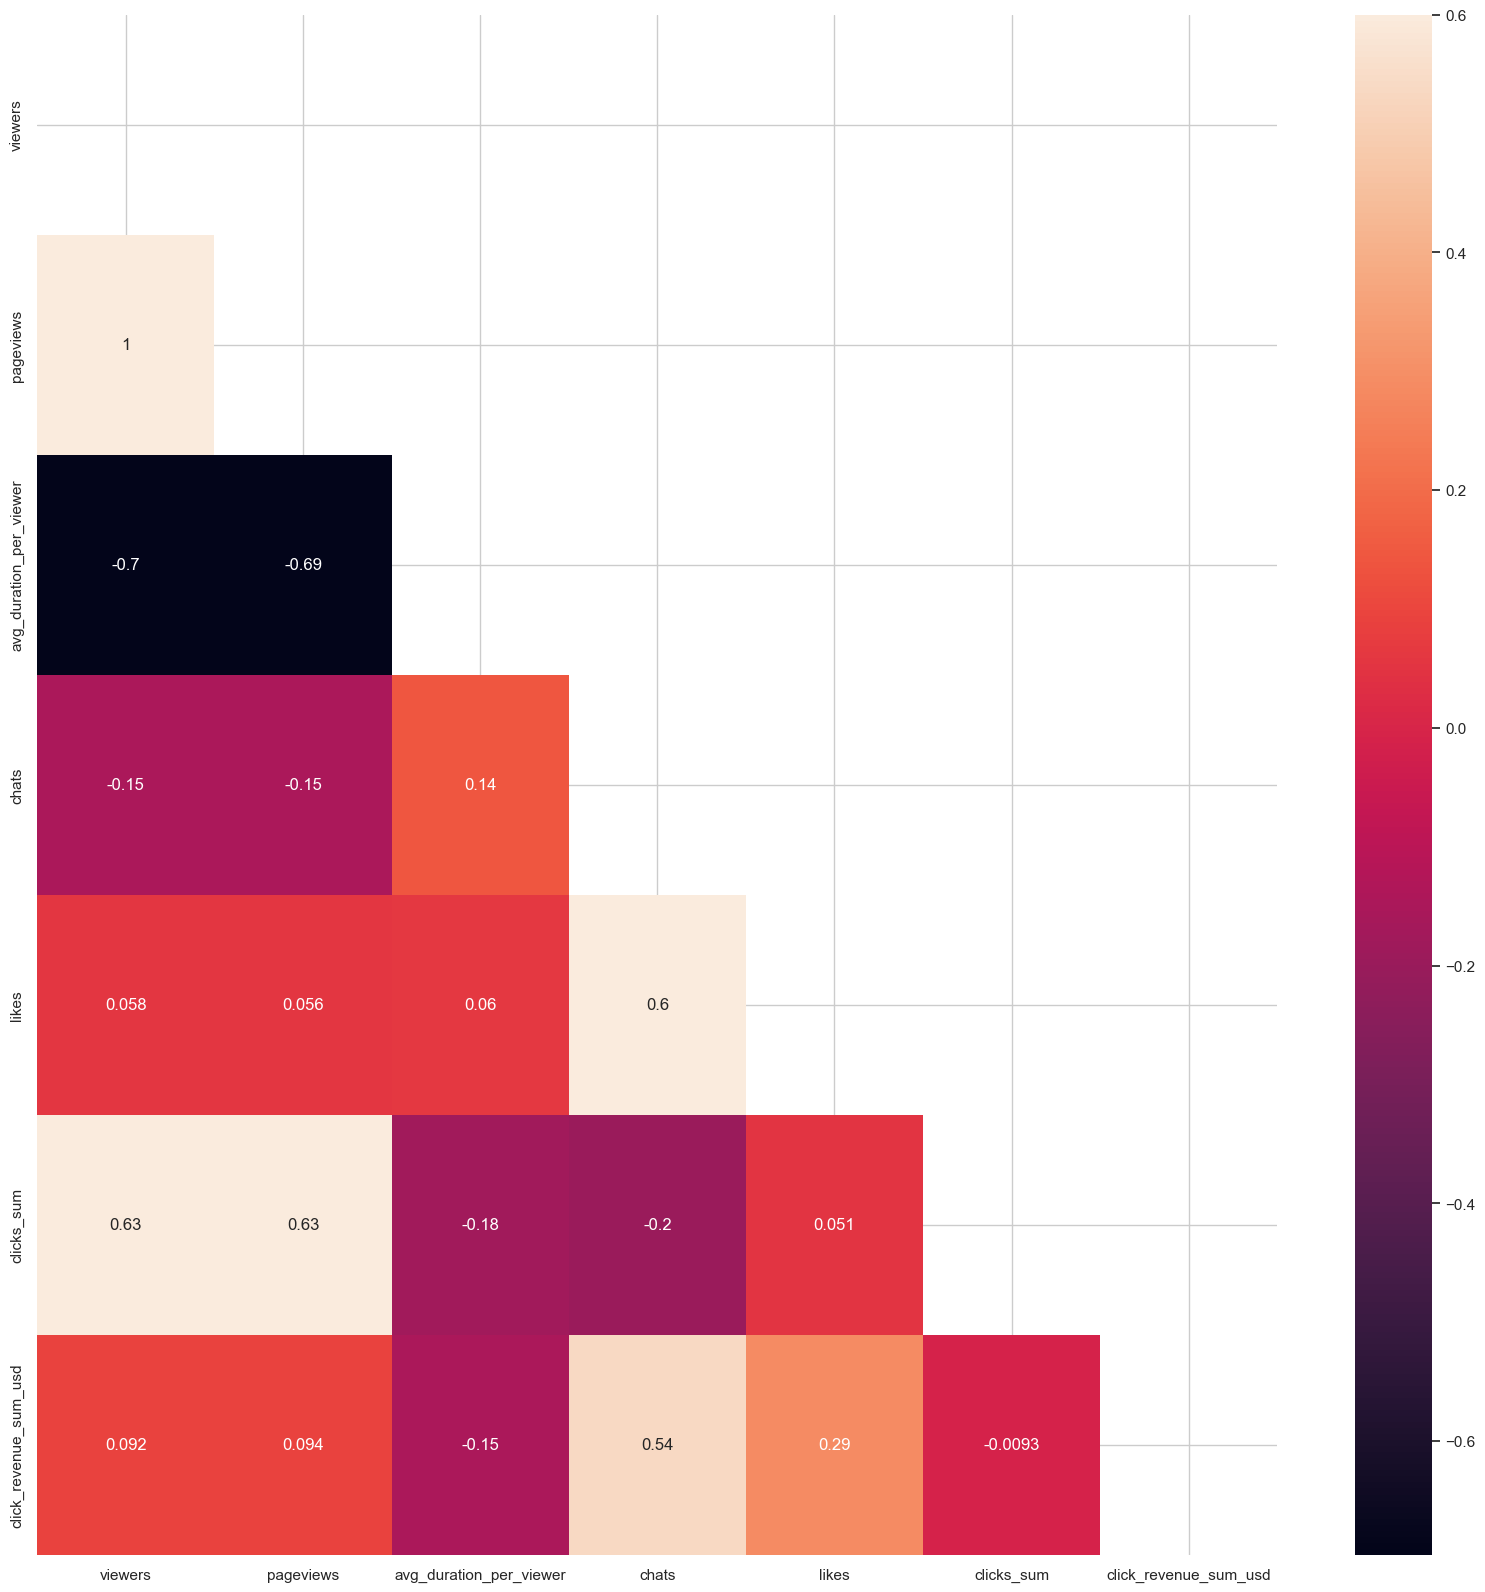

In [12]:
mask = np.triu(np.ones_like(clean_data_corr)) # add a mask
plt.figure(figsize=(20, 20))
sns.heatmap(clean_data_corr, vmax=0.6, annot=True, mask=mask)
plt.show()  

In [13]:
# Load dependencies/packages
import numpy as np # for array operations
import pandas as pd # for neat tables, database-like grouping/summary tables & csv_read
import matplotlib.pyplot as plt # for the occasional plot
import seaborn as sns # for the occasional plot
sns.set_theme(style="whitegrid")
import random # for random selection of starting variables/features/predictors

### Regression Machine Learning Model Architectures ###
from sklearn.model_selection import train_test_split, GridSearchCV # train / test split method & Grid Search cross validation
from multiprocessing import cpu_count

# baseline methods
from sklearn.linear_model import ElasticNet 
# (1) ElasticNet, parameter to tune: 'L1 ratio', where L1=1 Lasso, L1=0 i.e. L2=1 Ridge and 0<L1<1 is ElasticNet
from sklearn.neighbors import KNeighborsRegressor # (2) KNN, parameter to tune: 'k neighbors'
from sklearn.svm import SVR # (3) SVM Regression, parameters to tune: 'C regularization par' AND 'epsilon'

# ensemble methods
from sklearn.ensemble import RandomForestRegressor 
# (4) Random Forest (regression) split by 'squared error', parameter to tune: ... 
# ... 'min_samples_leaf' i.e. extent of how much the are individual trees grown AND 'n_estimators'
from sklearn.ensemble import AdaBoostRegressor  
from sklearn.ensemble import GradientBoostingRegressor 
# (5, 6) Boosting (regression), parameter to tune: 'learning rate' AND 'n_estimators'
 
# neural networks
from sklearn.neural_network import MLPRegressor
# (7) Neural Network, parameter to tune: 'alpha' AND 'hidden layer architecture'

# regression model metrics
from sklearn.metrics import mean_absolute_error, r2_score

# Ignore convergence warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [14]:
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [15]:
model_data = clean_data

In [16]:
for col in model_data.columns[:-1]:
    model_data[col] = normalize_data(model_data[col]) # cast to 0-1 scale

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    model_data.drop(columns=['click_revenue_sum_usd']), model_data['click_revenue_sum_usd'], test_size=0.3, random_state=57)

In [18]:
# Results DataFrame
col_names = ["Reg Model Type", "MSE best params", "MSE", "r2 best params", "r2"]
results_df = pd.DataFrame(columns=col_names)
results_df["Reg Model Type"] = ["ElasticNet", "KNN", "SVM", "RandomForest",
                               "AdaBoost", "GradientBoost", "NeuralNet"]
MSE_best_params_list = []
MSE_list = []
r2_best_params_list = []
r2_list = []

In [19]:
### Machine Learning Algorithm Applications ###
# (1) Linear Regression, ElasticNet MSE
param_grid = {
    "l1_ratio": [0, 0.1, 0.2, 0.35, 0.5, 0.65, 0.8, 0.9, 1],
}
elasticnet_MSE_model = GridSearchCV(estimator=ElasticNet(),
                             param_grid=param_grid, 
                             scoring='neg_mean_squared_error', cv=5, 
                             n_jobs=cpu_count(), refit=True)
elasticnet_MSE_model.fit(X_train, y_train)
elasticnet_MSE_best_params = elasticnet_MSE_model.best_params_ 
print(elasticnet_MSE_best_params) # i.e l1=0, i.e. Ridge
elasticnet_MSE_score = abs(elasticnet_MSE_model.score(X_test, y_test))
print(elasticnet_MSE_score)

{'l1_ratio': 0}
1.7243864758680445


In [20]:
# (1) Linear Regression, ElasticNet r^2
param_grid = {
    "l1_ratio": [0, 0.1, 0.2, 0.35, 0.5, 0.65, 0.8, 0.9, 1],
}
elasticnet_r2_model = GridSearchCV(estimator=ElasticNet(),
                             param_grid=param_grid, 
                             scoring='r2', cv=5, 
                             n_jobs=cpu_count(), refit=True)
elasticnet_r2_model.fit(X_train, y_train)
elasticnet_r2_best_params = elasticnet_r2_model.best_params_ 
print(elasticnet_r2_best_params) # i.e l1=0, i.e. Ridge
elasticnet_r2_score = elasticnet_r2_model.score(X_test, y_test)
print(elasticnet_r2_score)

{'l1_ratio': 0}
0.006789515175806504


In [21]:
MSE_best_params_list.append(str(elasticnet_MSE_best_params))
MSE_list.append(elasticnet_MSE_score)
r2_best_params_list.append(str(elasticnet_r2_best_params))
r2_list.append(elasticnet_r2_score)

In [22]:
# (2) KNN Regression MSE
param_grid = {
    "n_neighbors": np.arange(start=3, stop=15, step=2),
}

knn_MSE_model = GridSearchCV(estimator=KNeighborsRegressor(),
                      param_grid=param_grid,
                      scoring='neg_mean_squared_error', cv = 5,
                      n_jobs=cpu_count(), refit = True)
knn_MSE_model.fit(X_train, y_train)
knn_MSE_best_params = knn_MSE_model.best_params_ 
print(knn_MSE_best_params)
knn_MSE_score = abs(knn_MSE_model.score(X_test, y_test))
print(knn_MSE_score)

{'n_neighbors': 9}
1.4079159578076257


In [23]:
# (2) KNN Regression r^2
param_grid = {
    "n_neighbors": np.arange(start=3, stop=15, step=2),
}

knn_r2_model = GridSearchCV(estimator=KNeighborsRegressor(),
                      param_grid=param_grid,
                      scoring='r2', cv = 5,
                      n_jobs=cpu_count(), refit = True)
knn_r2_model.fit(X_train, y_train)
knn_r2_best_params = knn_r2_model.best_params_ 
print(knn_r2_best_params)
knn_r2_score = knn_r2_model.score(X_test, y_test)
print(knn_r2_score)

{'n_neighbors': 9}
0.18906990363520038


In [24]:
MSE_best_params_list.append(str(knn_MSE_best_params))
MSE_list.append(knn_MSE_score)
r2_best_params_list.append(str(knn_r2_best_params))
r2_list.append(knn_r2_score)

In [25]:
# (3) SVM Regression MSE
param_grid = {
    "C": [0.5, 1, 5, 10],
    "epsilon": [0.1, 0.2, 0.35, 0.5, 0.8, 1]
}

svm_MSE_model = GridSearchCV(estimator=SVR(),
                      param_grid=param_grid,
                      scoring='neg_mean_squared_error', cv = 5,
                      n_jobs=cpu_count(), refit = True)
svm_MSE_model.fit(X_train, y_train)
svm_MSE_best_params = svm_MSE_model.best_params_ 
print(svm_MSE_best_params)
svm_MSE_score = abs(svm_MSE_model.score(X_test, y_test))
print(svm_MSE_score)

{'C': 0.5, 'epsilon': 1}
1.684373008930807


In [26]:
# (3) SVM Regression r^2
param_grid = {
    "C": [0.5, 1, 5, 10],
    "epsilon": [0.1, 0.2, 0.35, 0.5, 0.8, 1]
}

svm_r2_model = GridSearchCV(estimator=SVR(),
                      param_grid=param_grid,
                      scoring='r2', cv = 5,
                      n_jobs=cpu_count(), refit = True)
svm_r2_model.fit(X_train, y_train)
svm_r2_best_params = svm_r2_model.best_params_ 
print(svm_r2_best_params)
svm_r2_score = svm_r2_model.score(X_test, y_test)
print(svm_r2_score)

{'C': 0.5, 'epsilon': 0.35}
-0.05361822267254368


In [27]:
MSE_best_params_list.append(str(svm_MSE_best_params))
MSE_list.append(svm_MSE_score)
r2_best_params_list.append(str(svm_r2_best_params))
r2_list.append(svm_r2_score)

In [28]:
# (4) Random Forest MSE
param_grid = {
    "n_estimators": [50, 100, 150, 200, 250],
    "min_samples_leaf": [1, 5, 10, 20, 50],
    "max_features": ['sqrt'],
}

randfor_MSE_model = GridSearchCV(estimator=RandomForestRegressor(),
                        param_grid=param_grid,
                        scoring='neg_mean_squared_error', cv=5,
                        n_jobs=cpu_count(), refit=True)
randfor_MSE_model.fit(X_train, y_train)
randfor_MSE_best_params = randfor_MSE_model.best_params_ 
print(randfor_MSE_best_params)
randfor_MSE_score = abs(randfor_MSE_model.score(X_test, y_test))
print(randfor_MSE_score)

{'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}
1.62607301828154


In [29]:
# (4) Random Forest r^2
param_grid = {
    "n_estimators": [50, 100, 150, 200, 250],
    "min_samples_leaf": [1, 5, 10, 20, 50],
    "max_features": ['sqrt'],
}

randfor_r2_model = GridSearchCV(estimator=RandomForestRegressor(),
                        param_grid=param_grid,
                        scoring='r2', cv=5,
                        n_jobs=cpu_count(), refit=True)
randfor_r2_model.fit(X_train, y_train)
randfor_r2_best_params = randfor_r2_model.best_params_ 
print(randfor_r2_best_params)
randfor_r2_score = randfor_r2_model.score(X_test, y_test)
print(randfor_r2_score)

{'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 50}
0.023401645541751948


In [30]:
MSE_best_params_list.append(str(randfor_MSE_best_params))
MSE_list.append(randfor_MSE_score)
r2_best_params_list.append(str(randfor_r2_best_params))
r2_list.append(randfor_r2_score)

In [31]:
# (5) AdaBoost MSE
param_grid = {
    "n_estimators": [50, 100, 200, 400],
    "learning_rate": [0.1, 0.25, 0.5],
}

adaboost_MSE_model = GridSearchCV(estimator=AdaBoostRegressor(),
                        param_grid=param_grid,
                        scoring='neg_mean_squared_error', cv=5,
                        n_jobs=cpu_count(), refit=True)
adaboost_MSE_model.fit(X_train, y_train)
adaboost_MSE_best_params = adaboost_MSE_model.best_params_ 
print(adaboost_MSE_best_params)
adaboost_MSE_score = abs(adaboost_MSE_model.score(X_test, y_test))
print(adaboost_MSE_score)

{'learning_rate': 0.25, 'n_estimators': 200}
1.9455399252882895


In [32]:
# (5) AdaBoost r^2
param_grid = {
    "n_estimators": [50, 100, 200], # narrowed search
    "learning_rate": [0.1, 0.25, 0.5],
}

adaboost_r2_model = GridSearchCV(estimator=AdaBoostRegressor(),
                        param_grid=param_grid,
                        scoring='r2', cv=5,
                        n_jobs=cpu_count(), refit=True)
adaboost_r2_model.fit(X_train, y_train)
adaboost_r2_best_params = adaboost_r2_model.best_params_ 
print(adaboost_r2_best_params)
adaboost_r2_score = adaboost_r2_model.score(X_test, y_test)
print(adaboost_r2_score)

{'learning_rate': 0.25, 'n_estimators': 50}
-0.09590874918551617


In [33]:
MSE_best_params_list.append(str(adaboost_MSE_best_params))
MSE_list.append(adaboost_MSE_score)
r2_best_params_list.append(str(adaboost_r2_best_params))
r2_list.append(adaboost_r2_score)

In [34]:
# (6) GradientBoost MSE
param_grid = {
    "n_estimators": [100, 200, 400],
    "learning_rate": [0.1, 0.25, 0.5],
}

gradboost_MSE_model = GridSearchCV(estimator=GradientBoostingRegressor(),
                        param_grid=param_grid,
                        scoring='neg_mean_squared_error', cv=5,
                        n_jobs=cpu_count(), refit=True)
gradboost_MSE_model.fit(X_train, y_train)
gradboost_MSE_best_params = gradboost_MSE_model.best_params_ 
print(gradboost_MSE_best_params)
gradboost_MSE_score = abs(gradboost_MSE_model.score(X_test, y_test))
print(gradboost_MSE_score)

{'learning_rate': 0.5, 'n_estimators': 400}
4.037434991013608


In [35]:
# (6) GradientBoost r^2
param_grid = {
    "n_estimators": [100, 200, 400],
    "learning_rate": [0.1, 0.25, 0.5],
}

gradboost_r2_model = GridSearchCV(estimator=GradientBoostingRegressor(),
                        param_grid=param_grid,
                        scoring='r2', cv=5,
                        n_jobs=cpu_count(), refit=True)
gradboost_r2_model.fit(X_train, y_train)
gradboost_r2_best_params = gradboost_r2_model.best_params_ 
print(gradboost_r2_best_params)
gradboost_r2_score = gradboost_r2_model.score(X_test, y_test)
print(gradboost_r2_score)

{'learning_rate': 0.25, 'n_estimators': 200}
-0.21688253282606196


In [36]:
MSE_best_params_list.append(str(gradboost_MSE_best_params))
MSE_list.append(gradboost_MSE_score)
r2_best_params_list.append(str(gradboost_r2_best_params))
r2_list.append(gradboost_r2_score)

In [37]:
# (7) Neural Network Regression MSE
param_grid = {
    'alpha': [1e-05, 0.001, 0.1, 0.35, 0.5, 0.8, 1],
    'hidden_layer_sizes': [(10,), (25,), (50,), (100,), (200,), (300,), (400,), (6, 3, 2), (10, 2), (15, 2), (20,2), (5, 3)],
}

cvnn_MSE_model = GridSearchCV(estimator=MLPRegressor(activation='relu', solver='adam'),
                        param_grid=param_grid,
                        scoring='neg_mean_squared_error', cv=5,
                        n_jobs=cpu_count(), refit=True)
cvnn_MSE_model.fit(X_train, y_train)
cvnn_MSE_best_params = cvnn_MSE_model.best_params_ 
print(cvnn_MSE_best_params)
cvnn_MSE_score = abs(cvnn_MSE_model.score(X_test, y_test))
print(cvnn_MSE_score)

{'alpha': 0.001, 'hidden_layer_sizes': (300,)}
1.5120596518023863


In [38]:
# (7) Neural Network Regression r^2
param_grid = {
    'alpha': [1e-05, 0.001, 0.1, 0.15, 0.2, 0.5, 0.8], # narrowed search
    'hidden_layer_sizes': [(200,), (300,), (400,), (20,2), (5, 5), (6, 3, 2)], # narrowed search
}

cvnn_r2_model = GridSearchCV(estimator=MLPRegressor(activation='relu', solver='adam'),
                        param_grid=param_grid,
                        scoring='r2', cv=5,
                        n_jobs=cpu_count(), refit=True)
cvnn_r2_model.fit(X_train, y_train)
cvnn_r2_best_params = cvnn_r2_model.best_params_ 
print(cvnn_r2_best_params)
cvnn_r2_score = cvnn_r2_model.score(X_test, y_test)
print(cvnn_r2_score)

{'alpha': 0.001, 'hidden_layer_sizes': (5, 5)}
-0.01723506779921391


In [39]:
MSE_best_params_list.append(str(cvnn_MSE_best_params))
MSE_list.append(cvnn_MSE_score)
r2_best_params_list.append(str(cvnn_r2_best_params))
r2_list.append(cvnn_r2_score)

In [40]:
results_df["MSE best params"] = MSE_best_params_list
results_df["MSE"] = MSE_list
results_df["r2 best params"] = r2_best_params_list
results_df["r2"] = r2_list

In [41]:
print('###### 12 Month Data, Machine Learning Model Performance #####')
results_df

###### 12 Month Data, Machine Learning Model Performance #####


,Reg Model Type,MSE best params,MSE,r2 best params,r2
0,ElasticNet,{'l1_ratio': 0},1.724386,{'l1_ratio': 0},0.006790
1,KNN,{'n_neighbors': 9},1.407916,{'n_neighbors': 9},0.189070
2,SVM,"{'C': 0.5, 'epsilon': 1}",1.684373,"{'C': 0.5, 'epsilon': 0.35}",-0.053618
3,RandomForest,"{'max_features': 'sqrt', 'min_samples_leaf': 5...",1.626073,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.023402
4,AdaBoost,"{'learning_rate': 0.25, 'n_estimators': 200}",1.945540,"{'learning_rate': 0.25, 'n_estimators': 50}",-0.095909
5,GradientBoost,"{'learning_rate': 0.5, 'n_estimators': 400}",4.037435,"{'learning_rate': 0.25, 'n_estimators': 200}",-0.216883
6,NeuralNet,"{'alpha': 0.001, 'hidden_layer_sizes': (300,)}",1.512060,"{'alpha': 0.001, 'hidden_layer_sizes': (5, 5)}",-0.017235


In [42]:
# KNN n=9 regression

In [43]:
# best_model.fit(X_train, y_train)

In [44]:
#best_model.score(X_test, y_test)

In [45]:
# test_point = 
# best_model.predict()
# {'l1_ratio': 0} Elastic net best